In [ ]:
import numpy as np
import keras
from keras import layers

# Loading Data

In [ ]:
# Read-in train_processed.csv
import pandas as pd
df_TP = pd.read_csv('train_processed.csv')
df_TP.head()
# store all ground truth labels
trainLabels: np.ndarray = df_TP['label'].values

In [ ]:
df_TP['label']

0        87
1        90
2        66
3        90
4        45
         ..
68210    23
68211    45
68212    96
68213    97
68214    72
Name: label, Length: 68215, dtype: int64

In [ ]:
print(trainLabels[:5])

[87 90 66 90 45]


In [ ]:
print(len(trainLabels))

68215


# Prepare Data

In [ ]:
num_classes: int = 100

## Set image sizes as 210 $×$ 210 from preprocessing

In [ ]:
!unzip ../content/drive/MyDrive/train_processed.zip

In [ ]:
# Testing if trainLabels matches number of images in train_processed/
from pathlib import Path
img_dir = Path('train_processed/')
num_imgs= len(df_TP['file name'].values)

In [ ]:
print(num_imgs)

68215


In [ ]:
df_TP['file name'].values[:5]

array(['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg'], dtype=object)

In [ ]:
# Load all images from /train_processed
# Want a list of 2D arrays
# From preprocessing, the median of all image sizes is (210, 210)
import cv2

dir_name = 'train_processed/'
names = df_TP['file name'].values

imgMatrixArray = np.array([cv2.imread(dir_name + 'gray_' + name, cv2.IMREAD_GRAYSCALE) for name in names])
imgMatrixArray.shape

(68215, 210, 210)

## Check if my imgMatrixArray is correct

In [ ]:
import matplotlib.pyplot as plt

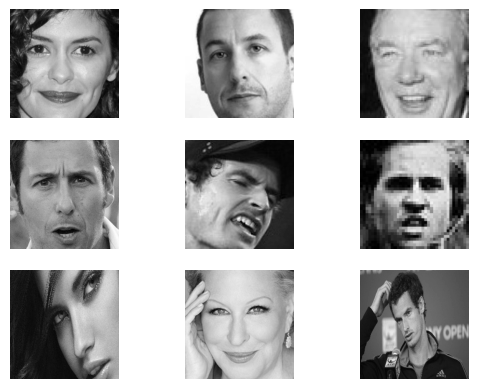

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(imgMatrixArray[i], cmap='gray')
  plt.axis("off")

In [ ]:
trainLabels[:9].reshape((3,3))

array([[87, 90, 66],
       [90, 45, 93],
       [71, 99, 45]])

## train_test_split: looks correct Since lable and images looks aligned.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgMatrixArray, trainLabels, test_size=0.2, random_state=42)

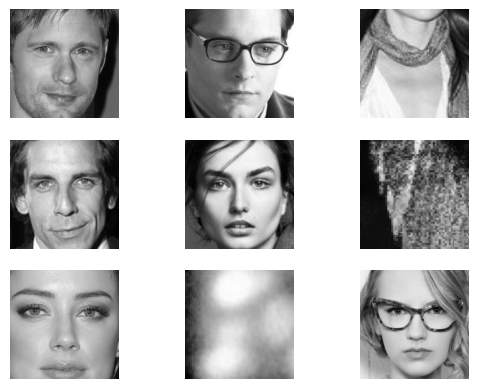

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis("off")

In [ ]:
y_train[:9].reshape((3,3))

array([[ 6, 27, 28],
       [57, 15, 94],
       [77,  9,  7]])

# Setup and Train Model

In [ ]:
X_train[0].shape

(210, 210)

In [ ]:
# Setup NN pipeline
model = keras.Sequential(
    [
        keras.Input(shape=(210, 210, 1)),
        # Just do 2 layers for now as a test
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(3, 3)),
        layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(3, 3)),
        # Flatten the tensor after 2 layers
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")   # dense layer then softmax here
      ]
  )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 206, 206, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 68, 68, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 21, 21, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dropout (Dropout)           (None, 28224)             0

In [ ]:
# ensure each image has (210, 210, 1) dimension
X_train = X_train.reshape(-1, 210, 210, 1)
X_test = X_test.reshape(-1, 210, 210, 1)
print(X_train.shape)
print(X_test.shape)

(54572, 210, 210, 1)
(13643, 210, 210, 1)


In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(54572, 100)
(13643, 100)


In [ ]:
# Training Model
batch_size = 128
epochs = 15

# configures model (set up how to evaluate accuracy, use what optimizer during training)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# train model on X_train, y_train
model.fit(X_train, y_train, batch_size=batch_size,
          epochs=epochs, validation_split=0.2, shuffle=True)

Epoch 1/15
342/342 [==============================] - 37s 86ms/step - loss: 5.7949 - accuracy: 0.0102 - val_loss: 4.5980 - val_accuracy: 0.0148
Epoch 2/15
342/342 [==============================] - 28s 81ms/step - loss: 4.5658 - accuracy: 0.0202 - val_loss: 4.5912 - val_accuracy: 0.0197
Epoch 3/15
342/342 [==============================] - 28s 81ms/step - loss: 4.5033 - accuracy: 0.0332 - val_loss: 4.6307 - val_accuracy: 0.0267
Epoch 4/15
342/342 [==============================] - 28s 81ms/step - loss: 4.4275 - accuracy: 0.0470 - val_loss: 4.6259 - val_accuracy: 0.0338
Epoch 5/15
342/342 [==============================] - 28s 82ms/step - loss: 4.3455 - accuracy: 0.0628 - val_loss: 4.7274 - val_accuracy: 0.0440
Epoch 6/15
342/342 [==============================] - 28s 83ms/step - loss: 4.2625 - accuracy: 0.0794 - val_loss: 4.7325 - val_accuracy: 0.0503
Epoch 7/15
342/342 [==============================] - 28s 82ms/step - loss: 4.1788 - accuracy: 0.0973 - val_loss: 4.8309 - val_accuracy:

# Evaluate Performance on Validation (test) Set

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 5.9833598136901855
Test accuracy: 0.10613501071929932


# Generate Submission.csv

In [ ]:
# Read test.csv for Ids
Id = pd.read_csv('test.csv')['Id'].values

In [ ]:
print(Id)

[  0   1  10 ... 997 998 999]


In [ ]:
print(len(Id))

4977


In [ ]:
print(type(Id[0]))

<class 'numpy.int64'>


In [ ]:
!unzip /content/drive/MyDrive/test_processed.zip

Archive:  /content/drive/MyDrive/test_processed.zip
replace test_processed/gray_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

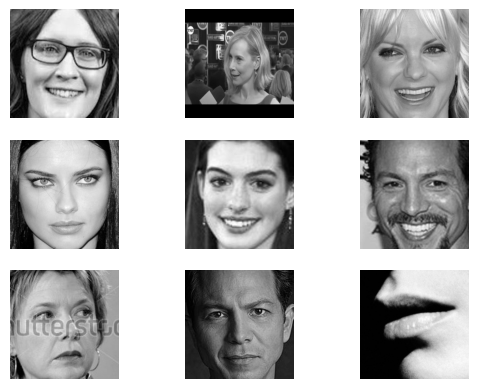

In [ ]:
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(cv2.imread(f'test_processed/gray_{Id[i]}.jpg', cv2.IMREAD_GRAYSCALE), cmap='gray')
  plt.axis("off")

In [ ]:
img = cv2.imread(f'test_processed/gray_{Id[0]}.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)
print(type(img))
print(img[:3,:3])

(210, 210)
<class 'numpy.ndarray'>
[[140 119  84]
 [134 112  76]
 [119  96  63]]


In [ ]:
test_dir = Path('test_processed')
num_images = len(list(test_dir.glob('*.jpg')))
print(num_images)

4977


In [ ]:
import PIL.Image as Image
# Load up test dataset to colab
Xn = np.array([np.asarray(Image.open(f'test_processed/gray_{name}.jpg').convert('L'))
                for name in Id])

In [ ]:
print(Xn.shape)

(4977, 210, 210)


In [ ]:
test_predictions = model.predict(Xn)

156/156 [==============================] - 1s 7ms/step


In [ ]:
print(test_predictions.shape)
print(np.argmax(test_predictions[0]))

(4977, 100)
24


In [ ]:
# Read all valid labels
df_categories = pd.read_csv('category.csv')
df_categories.head()

,Unnamed: 0,Category
0,0,Art Carney
1,1,Akemi Darenogare
2,2,Billy Bob Thornton
3,3,Bill Daley
4,4,Amanda Bynes


In [ ]:
with open('submission.csv', 'w') as f:
    f.write('Id,Category\n')
    for i, p in zip(Id, test_predictions):
        numeric_label = np.argmax(p)
        category = df_categories.loc[df_categories['Unnamed: 0'] == numeric_label]['Category'].values[0]
        f.write('{},{}\n'.format(i, category))

# Check number of rows in submission.csv

In [ ]:
df_submit = pd.read_csv('submission.csv')
print(len(df_submit))

4977
